In [311]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter 
import sys, os
import imageio, re
import importlib as imp
import copy
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

import pickle

from datetime import datetime



In [312]:
layer_depth = [0.0, 10.0, 10.0+45.0, 10.0+45.0+45.0]
#51.0,99.0,53.0[cm]
time_step_for_plotting = 1
theta_e_vec = [0.43,0.45,0.41] #edit for your scenario 
max_depth = layer_depth[-1]
# 36.0,111.0,107.0

In [313]:
c_path_layers = 'outputs/synthetic2_LGARTO/data_layers.csv'
sim_case = 'outputs/synthetic2_LGARTO/data_variables.csv' 


In [314]:
# hydrus_path_layers = '/Users/peterlafollette/Desktop/ngen_test_2/ngen/extern/LGARTO-C/tests/HYDRUS_outputs/Geneva/Nod_Inf.csv'
# data_sim_hydrus = pd.read_csv(hydrus_path_layers, sep='\s+')

# # data_sim_hydrus = data_sim_hydrus[0:100]
# # data_sim_hydrus = data_sim_hydrus[101:201]
# # data_sim_hydrus = data_sim_hydrus[202:302]
# data_sim_hydrus = data_sim_hydrus[202:]

In [315]:
data_sim_c = np.loadtxt(c_path_layers,dtype='str')
# data_sim_py = data_sim_c #setting these equal for now to get code working -- attempting to remove data_sim_py from code 

Depth_d = []
Theta_d = []
Head_d = []
Dat_u = []
Dat_v = []




In [316]:
count = 0
for u in data_sim_c:
    u1 = u[1:-1].split('|')
    val_u = []

    for u2 in u1:
        u3 = u2[1:-1].split(',')
        u4 = [float(u3[0]), float(u3[1]), float(u3[4])]
        val_u.append(u4)
        
    count = count + 1
    Dat_u.append(val_u)

In [317]:
def data_gen1():
    for u in data_sim_c[::12]:
        v1 = u[1:-1].split('|')
        val_c = []
        
        for v2 in v1:
            v3 = v2[1:-1].split(',')
            v4 = [float(v3[0]), float(v3[1]), float(v3[4])]
            val_c.append(v4)
        
        yield val_c
        
time = np.arange(0,len(Dat_u)/12.,1.) # 1/12 = 5/60 (min/hr)
time = [round (t,3) for t in time]

In [318]:
def data_gen2():
    c = -1
    #print (len(time))
    for u in data_sim_c[::12]:
        u1 = u[1:-1].split('|')
#         v1 = v[1:-1].split('],')
        val_u = []
#         val_v = []
        for u2 in u1:
            u3 = u2[1:-1].split(',')
            u4 = [float(u3[0]), float(u3[1]), float(u3[4])]
            val_u.append(u4)

#         for v2 in v1:
#             v3 = v2[1:-1].split(',')
#             v3[0] = v3[0].replace('[', '')
#             depth = float(v3[0]) + layer_depth[int(v3[2])]
#             v4 = [depth, round(float(v3[1]),6), float(v3[2])]
#             #v4 = [float(v3[0]), round(float(v3[1]),6), float(v3[3])]
#             val_v.append(v4)
        c = c +1
        
        yield time[c], val_u



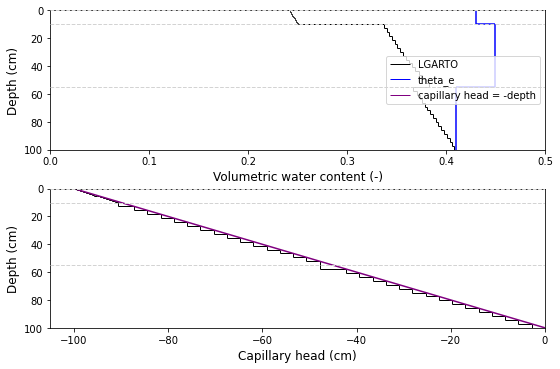

In [319]:
# %matplotlib notebook
fig, axs = plt.subplots(2,1,figsize=(6*1.3,4*1.3))
fig.tight_layout(pad=1.8)
len_simulation = len(Dat_u)

# for i in range(time_step_for_plotting-1,time_step_for_plotting):
i = time_step_for_plotting-1
d = Dat_u[i]
num_wf = len(d)

lines_LGARTO = axs[0].hlines(0,0,0,color='k',lw=1)
###plots theta vs depth
for j in range(num_wf):
    if j ==0 :
        axs[0].vlines(d[j][1],0,d[j][0]*0.1,color='k',lw=1)
    else:
        axs[0].vlines(d[j][1],d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
        lines_LGARTO = axs[0].hlines(d[j-1][0]*0.1,d[j-1][1],d[j][1],color='k',lw=1)

axs[0].set_ylim(0,layer_depth[-1])
axs[0].invert_yaxis()
axs[0].set_xlim(0,0.5)

axs[0].set_ylabel('Depth (cm)',fontsize=12)
axs[0].set_xlabel('Volumetric water content (-)',fontsize=12)

count = 0
for k in layer_depth:
        #print (k)
    if (k!=layer_depth[-1]):
        axs[0].vlines(theta_e_vec[count], ymin=k, ymax=layer_depth[count+1],color='blue')

    if ((count==1)|(count==2)):
        axs[0].hlines(k, xmin=theta_e_vec[count], xmax=theta_e_vec[count-1],color='blue')

    if (k==layer_depth[-1]):
        axs[0].axhline(k, ls='solid', color='black', lw=1, zorder=10)
    else:
        axs[0].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

    count = count + 1




max_val_psi = 0
for row in d:
    if (max_val_psi<max(row)):
        max_val_psi = max(row)

max_val_psi = max_val_psi*0.1

d = Dat_u[i]
num_wf = len(d)

###plots psi vs depth
for j in range(num_wf):
    if j ==0 :
        axs[1].vlines(-d[j][2]*0.1,0,d[j][0]*0.1,color='k',lw=1)
    else:
        axs[1].vlines(-d[j][2]*0.1,d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
        axs[1].hlines(d[j-1][0]*0.1,-d[j-1][2]*0.1,-d[j][2]*0.1,color='k',lw=1)

axs[1].set_ylim(0,layer_depth[-1])
axs[1].invert_yaxis()
axs[1].set_xlim(-max_val_psi*1.05,0)

axs[1].set_ylabel('Depth (cm)',fontsize=12)
axs[1].set_xlabel('Capillary head (cm)',fontsize=12)

count = 0
for k in layer_depth:

    if (k==layer_depth[-1]):
        axs[1].axhline(k, ls='solid', color='black', lw=1, zorder=10)
    else:
        axs[1].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

    count = count + 1

hydrostatic_line_data_x = [-1*layer_depth[-1], 0]
hydrostatic_line_data_y = [0, layer_depth[-1]]
hydrostatic_line = axs[1].plot(np.array(hydrostatic_line_data_x),np.array(hydrostatic_line_data_y),color='purple')

leg = axs[0].legend(handles=[lines_LGARTO,lines_LGARTO,lines_LGARTO],labels=["LGARTO", "theta_e", "capillary head = -depth"],loc=5)

leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('purple')

plt.savefig("profile_xxx.pdf")


In [320]:
i = time_step_for_plotting-1
i=200

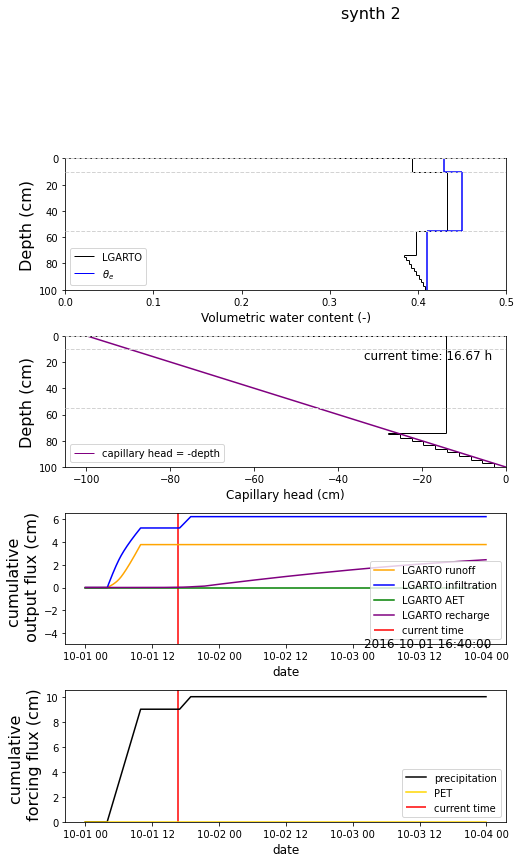

In [321]:
# %matplotlib notebook
fig, axs = plt.subplots(4,1,figsize=(4.5*1.7,6*1.7))
fig.tight_layout(pad=2.5)
len_simulation = len(Dat_u)

# for i in range(time_step_for_plotting-1,time_step_for_plotting):
# i = time_step_for_plotting-1
# i=3000
d = Dat_u[i]
num_wf = len(d)

lines_LGARTO = axs[0].hlines(0,0,0,color='k',lw=1)
###plots theta vs depth
for j in range(num_wf):
    if j ==0 :
        axs[0].vlines(d[j][1],0,d[j][0]*0.1,color='k',lw=1)
    else:
        axs[0].vlines(d[j][1],d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
        lines_LGARTO = axs[0].hlines(d[j-1][0]*0.1,d[j-1][1],d[j][1],color='k',lw=1)

axs[0].set_ylim(0,layer_depth[-1])
axs[0].invert_yaxis()
axs[0].set_xlim(0,0.5)

axs[0].set_ylabel('Depth (cm)',fontsize=16)
axs[0].set_xlabel('Volumetric water content (-)',fontsize=12)

count = 0
for k in layer_depth:
        #print (k)
    if (k!=layer_depth[-1]):
        axs[0].vlines(theta_e_vec[count], ymin=k, ymax=layer_depth[count+1],color='blue')

    if ((count==1)|(count==2)):
        axs[0].hlines(k, xmin=theta_e_vec[count], xmax=theta_e_vec[count-1],color='blue')

    if (k==layer_depth[-1]):
        axs[0].axhline(k, ls='solid', color='black', lw=1, zorder=10)
    else:
        axs[0].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

    count = count + 1




max_val_psi = 0
for row in d:
    if (max_val_psi<max(row)):
        max_val_psi = max(row)

max_val_psi = max_val_psi*0.1

d = Dat_u[i]
num_wf = len(d)

###plots psi vs depth
for j in range(num_wf):
    if j ==0 :
        axs[1].vlines(-d[j][2]*0.1,0,d[j][0]*0.1,color='k',lw=1)
    else:
        axs[1].vlines(-d[j][2]*0.1,d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
        axs[1].hlines(d[j-1][0]*0.1,-d[j-1][2]*0.1,-d[j][2]*0.1,color='k',lw=1)

axs[1].set_ylim(0,layer_depth[-1])
axs[1].invert_yaxis()
axs[1].set_xlim(-max_val_psi*1.05,0)

axs[1].set_ylabel('Depth (cm)',fontsize=16)
axs[1].set_xlabel('Capillary head (cm)',fontsize=12)

count = 0
for k in layer_depth:

    if (k==layer_depth[-1]):
        axs[1].axhline(k, ls='solid', color='black', lw=1, zorder=10)
    else:
        axs[1].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

    count = count + 1

hydrostatic_line_data_x = [-1*layer_depth[-1], 0]
hydrostatic_line_data_y = [0, layer_depth[-1]]
hydrostatic_line = axs[1].plot(np.array(hydrostatic_line_data_x),np.array(hydrostatic_line_data_y),color='purple')

leg = axs[0].legend(handles=[lines_LGARTO,lines_LGARTO,lines_LGARTO],labels=["LGARTO", r"$\theta_{e}$"],loc=3)

leg.legendHandles[1].set_color('blue')



leg2 = axs[1].legend(handles=[lines_LGARTO,lines_LGARTO,lines_LGARTO],labels=["capillary head = -depth"],loc=3)
leg2.legendHandles[0].set_color('purple')





c_path_vars = sim_case


num_steps = 864 + 1
    
start = pd.Timestamp("2020-10-01 00:00:00")
end = pd.Timestamp("2020-10-03 00:00:00")
times = pd.date_range(start=start,end=end, periods=num_steps) #freq='min'
times_bmi = pd.date_range(start=start,end=end, periods=num_steps)
times_bmi = []
for item in data_c_vars['Time']:
    times_bmi.append(datetime.strptime(item, '%Y-%m-%d %H:%M:%S'))
#     datetime.datetime.strptime(data_c_vars_LGARTO['Time'][i], '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(data_c_vars_LGARTO['Time'][0],'%Y-%m-%d %H:%M:%S')
# times_bmi = times_bmi[0:len(times_bmi)-1]

xfmt = mdates.DateFormatter('%Y/%m/%d')


data_c_vars = pd.read_csv(c_path_vars)
data_c_vars = data_c_vars[0:num_steps]


m_to_mm = 1000


vars_bmi = ['soil_storage', 'surface_runoff', 'infiltration', 'actual_evapotranspiration', 'mass_balance', 'percolation', 'precipitation', 'potential_evapotranspiration']

# vars_hydrus = [')     Volume', 'sum(RunOff', 'sum(Infil', ')   sum(vRoot', ')    sum(vBot']
m_to_mm = 1000
m_to_cm = 100
timestep = 300/3600
y_labels = ['Storage (cm)', 'Runoff (cm)', 'Infiltration (cm)', 'Actual ET (cm)', 'Mass balance (cm)', 'Recharge (cm)']


axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[1]]*m_to_cm),'b',label='C (bmi)',color='orange')
# plt.plot(HYDRUS_output[vars_hydrus[1]],'k',linestyle='dashed',label='Hydrus',color='orange')

axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[2]]*m_to_cm),'b',label='C (bmi)',color='blue')
# plt.plot(HYDRUS_output[vars_hydrus[2]],'k',linestyle='dashed',label='Hydrus',color='blue')

axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[3]]*m_to_cm),'b',label='C (bmi)',color='green')
# plt.plot(HYDRUS_output[vars_hydrus[3]],'k',linestyle='dashed',label='Hydrus',color='green')

axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[5]]*m_to_cm),'b',label='C (bmi)',color='purple')
# plt.plot(HYDRUS_output[vars_hydrus[4]],'k',linestyle='dashed',label='Hydrus',color='purple')

axs[2].vlines(x=times_bmi[i], ymin=-100, ymax=1000, colors='red')

#axs[2].plot(times_bmi, data_c_vars[vars_bmi[5]] * m_to_cm*12, label='C (bmi)', color='green')


leg = axs[2].legend()#(handles=[runoff_line_HYDRUS,runoff_line_HYDRUS,runoff_line_HYDRUS,runoff_line_HYDRUS],labels=["LGARTO", "HYDRUS", "theta_e", "capillary head = -depth"])

mylabels = ['LGARTO runoff','LGARTO infiltration','LGARTO AET','LGARTO recharge', 'current time']
axs[2].legend(labels=mylabels)

axs[2].text(x=times_bmi[550], y=50, s='synth 2', fontsize = 16)

axs[2].set_ylabel("cumulative \n output flux (cm)",fontsize=16)
axs[2].set_xlabel("date",fontsize=12)

axs[2].set_ylim(min(np.cumsum(data_c_vars[vars_bmi[5]]*m_to_cm))-5, 1.05*max(max(np.cumsum(data_c_vars[vars_bmi[1]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[2]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[3]]*m_to_cm))))




axs[3].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[6]]*m_to_cm),'b',label='C (bmi)',color='black')
axs[3].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[7]]*m_to_cm),'b',label='C (bmi)',color='gold')

axs[3].set_ylim(0, 1.05*max(max(np.cumsum(data_c_vars[vars_bmi[7]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[6]]*m_to_cm))))

axs[3].set_ylabel("cumulative \n forcing flux (cm)",fontsize=16)

axs[3].set_xlabel("date",fontsize=12)

axs[3].vlines(x=times_bmi[i], ymin=-100, ymax=1000, colors='red')

axs[3].text(x=times_bmi[600], y=32+5, s='current time: '+str(round(i/12,2))+' h', fontsize = 12)
axs[3].text(x=times_bmi[600], y=15-1, s=str(times_bmi[i]), fontsize = 12)


mylabels_forcing = ['precipitation', 'PET', 'current time']
axs[3].legend(labels=mylabels_forcing)

fig.subplots_adjust(left=0.14)

plt.savefig("profile_xxx.pdf")

In [322]:
d = Dat_u[0]
max_val_psi = 0

for d in Dat_u:
    for row in d:
        if (max_val_psi<max(row)):
            max_val_psi = max(row)

max_val_psi = max_val_psi*0.1 + 10


In [323]:
max_val_psi

192.1875

In [324]:
def init():
    for ax in axs:
        ax.clear()

In [325]:
def animate(frame):
    
    for ax in axs:
        ax.clear()
    
    d = Dat_u[frame]
    num_wf = len(d)
    
    fig.subplots_adjust(left=0.14)

    lines_LGARTO = axs[0].hlines(0,0,0,color='k',lw=1)
    ###plots theta vs depth
    for j in range(num_wf):
        if j ==0 :
            axs[0].vlines(d[j][1],0,d[j][0]*0.1,color='k',lw=1)
        else:
            axs[0].vlines(d[j][1],d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
            lines_LGARTO = axs[0].hlines(d[j-1][0]*0.1,d[j-1][1],d[j][1],color='k',lw=1)

    axs[0].set_ylim(0,layer_depth[-1])
    axs[0].invert_yaxis()
    axs[0].set_xlim(0,0.5)

    axs[0].set_ylabel('Depth (cm)',fontsize=16)
    axs[0].set_xlabel('Volumetric water content (-)',fontsize=12)

    count = 0
    for k in layer_depth:
            #print (k)
        if (k!=layer_depth[-1]):
            axs[0].vlines(theta_e_vec[count], ymin=k, ymax=layer_depth[count+1],color='blue')

        if ((count==1)|(count==2)):
            axs[0].hlines(k, xmin=theta_e_vec[count], xmax=theta_e_vec[count-1],color='blue')

        if (k==layer_depth[-1]):
            axs[0].axhline(k, ls='solid', color='black', lw=1, zorder=10)
        else:
            axs[0].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

        count = count + 1




#     max_val_psi = 0
#     for row in d:
#         if (max_val_psi<max(row)):
#             max_val_psi = max(row)

#     max_val_psi = max_val_psi*0.1
#     max_val_psi = 400

    d = Dat_u[frame]
    num_wf = len(d)

    ###plots psi vs depth
    for j in range(num_wf):
        if j ==0 :
            axs[1].vlines(-d[j][2]*0.1,0,d[j][0]*0.1,color='k',lw=1)
        else:
            axs[1].vlines(-d[j][2]*0.1,d[j-1][0]*0.1,d[j][0]*0.1,color='k',lw=1)
            axs[1].hlines(d[j-1][0]*0.1,-d[j-1][2]*0.1,-d[j][2]*0.1,color='k',lw=1)

    axs[1].set_ylim(0,layer_depth[-1])
    axs[1].invert_yaxis()
    axs[1].set_xlim(-max_val_psi*1.05,0)

    axs[1].set_ylabel('Depth (cm)',fontsize=16)
    axs[1].set_xlabel('Capillary head (cm)',fontsize=12)

    count = 0
    for k in layer_depth:

        if (k==layer_depth[-1]):
            axs[1].axhline(k, ls='solid', color='black', lw=1, zorder=10)
        else:
            axs[1].axhline(k, ls='dashed', color='lightgrey', lw=1, zorder=10)

        count = count + 1

    hydrostatic_line_data_x = [-1*layer_depth[-1], 0]
    hydrostatic_line_data_y = [0, layer_depth[-1]]
    hydrostatic_line = axs[1].plot(np.array(hydrostatic_line_data_x),np.array(hydrostatic_line_data_y),color='purple')

    leg = axs[0].legend(handles=[lines_LGARTO,lines_LGARTO],labels=["LGARTO", r"$\theta_{e}$"],loc=3,)

    leg.legendHandles[1].set_color('blue')
#     leg.legendHandles[2].set_color('purple')

    leg2 = axs[1].legend(handles=[lines_LGARTO,lines_LGARTO,lines_LGARTO],labels=["capillary head = -depth"],loc=3)
    leg2.legendHandles[0].set_color('purple')
    
    


    
    
    
    

    axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[1]]*m_to_cm),'b',label='C (bmi)',color='orange')
    # plt.plot(HYDRUS_output[vars_hydrus[1]],'k',linestyle='dashed',label='Hydrus',color='orange')

    axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[2]]*m_to_cm),'b',label='C (bmi)',color='blue')
    # plt.plot(HYDRUS_output[vars_hydrus[2]],'k',linestyle='dashed',label='Hydrus',color='blue')

    axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[3]]*m_to_cm),'b',label='C (bmi)',color='green')
    # plt.plot(HYDRUS_output[vars_hydrus[3]],'k',linestyle='dashed',label='Hydrus',color='green')

    axs[2].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[5]]*m_to_cm),'b',label='C (bmi)',color='purple')
    # plt.plot(HYDRUS_output[vars_hydrus[4]],'k',linestyle='dashed',label='Hydrus',color='purple')

    
    
    
    
    
    
    axs[2].vlines(x=times_bmi[frame], ymin=-100, ymax=1000, colors='red')
    
    leg = axs[2].legend()#(handles=[runoff_line_HYDRUS,runoff_line_HYDRUS,runoff_line_HYDRUS,runoff_line_HYDRUS],labels=["LGARTO", "HYDRUS", "theta_e", "capillary head = -depth"])

    mylabels = ['LGARTO runoff','LGARTO infiltration','LGARTO AET','LGARTO recharge', 'current time']
    axs[2].legend(labels=mylabels)

    axs[2].text(x=times_bmi[550], y=50, s='synth 2', fontsize = 16)

    axs[2].set_ylabel("cumulative \n output flux (cm)",fontsize=16)
    axs[2].set_xlabel("date",fontsize=12)
    
#     axs[2].plot(times_bmi, data_c_vars[vars_bmi[5]] * m_to_cm*12, label='C (bmi)', color='green')


    axs[2].set_ylim(min(np.cumsum(data_c_vars[vars_bmi[5]]*m_to_cm))-5, 1.05*max(max(np.cumsum(data_c_vars[vars_bmi[1]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[2]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[3]]*m_to_cm))))
#     axs[2].set_ylim(-0.05,0.15)




    axs[3].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[6]]*m_to_cm),'b',label='C (bmi)',color='black')
    axs[3].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[7]]*m_to_cm),'b',label='C (bmi)',color='gold')

    axs[3].set_ylim(0, 1.05*max(max(np.cumsum(data_c_vars[vars_bmi[7]]*m_to_cm)), max(np.cumsum(data_c_vars[vars_bmi[6]]*m_to_cm))))

    axs[3].vlines(x=times_bmi[frame], ymin=-100, ymax=1000, colors='red')
    
    axs[3].text(x=times_bmi[600], y=32+5, s='current time: '+str(round(frame/12,2))+' h', fontsize = 12)
    axs[3].text(x=times_bmi[600], y=15-1, s=str(times_bmi[frame]), fontsize = 12)
    
    mylabels_forcing = ['precipitation', 'PET', 'current time']
    axs[3].legend(labels=mylabels_forcing)
    
    axs[3].set_xlabel("date",fontsize=12)

    axs[3].set_ylabel("cumulative \n forcing flux (cm)",fontsize=16)



In [326]:
init()

start_move_writing_time = datetime.now()

ani = FuncAnimation(fig, animate, frames = 10000,  init_func=init, blit=False,repeat=False)
# ani.save('LGARTO_animation.mp4', dpi=600, fps=50, extra_args=['-vcodec', 'libx264'])
ani.save('LGARTO_animation_synth_2.mp4', dpi=400, fps=48, extra_args=['-vcodec', 'libx264', '-preset', 'veryslow', '-crf', '17'])

# ani.save('LGARTO_animation.gif', fps=50)

end_move_writing_time = datetime.now()

IndexError: list index out of range

In [ ]:
#time it took to write movie. It can be a computationally intensive thing 
end_move_writing_time - start_move_writing_time
#mp4 blit=False time: 174 seconds for 200 frames
#then edited with 'veryslow' and crf of 17, 188 seconds for 200 frames
#next trying with 30 fps and 300 dpi, using the slower extra_args ... 132 seconds for 200 frames
#dpi=300, fps=60, slow args: 135 seconds for 200 frames, and doesn't have the freezing problem, but does kind of feel jerky. Maybe too fast, 30 fps version looked smoother. But it's a bit slow, so 45 is a good medium 


In [ ]:
# plt.show()

In [ ]:
#extra_args=['-vcodec', 'libx264']